<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [195]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#for modeling
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [196]:
#read data file
sacramento = pd.read_csv("./datasets/sacramento_real_estate_transactions.csv")

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [197]:
#checking data sample
sacramento.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [198]:
#checking data information
sacramento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [199]:
#the logitude data for California is incorrect. the logitude and lattidue should be positive number. 
#change logitude data to positive.
sacramento['longitude'] = sacramento['longitude'].abs()     
sacramento['latitude'] = sacramento['latitude'].abs()     

In [200]:
#change data type of Zip code from int64 to object
#change data type of longitude and latitude from float to object
sacramento['zip'] = sacramento['zip'].astype('object')
sacramento['latitude'] = sacramento['latitude'].astype('object')
sacramento['longitude'] = sacramento['longitude'].astype('object')
sacramento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   street     985 non-null    object
 1   city       985 non-null    object
 2   zip        985 non-null    object
 3   state      985 non-null    object
 4   beds       985 non-null    int64 
 5   baths      985 non-null    int64 
 6   sq__ft     985 non-null    int64 
 7   type       985 non-null    object
 8   sale_date  985 non-null    object
 9   price      985 non-null    int64 
 10  latitude   985 non-null    object
 11  longitude  985 non-null    object
dtypes: int64(4), object(8)
memory usage: 92.5+ KB


In [201]:
#checking missing values
sacramento.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [202]:
#checking values of data columns
sacramento['street'].value_counts()

8306 CURLEW CT         2
4734 14TH AVE          2
1223 LAMBERTON CIR     2
7 CRYSTALWOOD CIR      2
3526 HIGH ST           1
                      ..
2981 WRINGER DR        1
8616 ROCKPORTE CT      1
4128 HILL ST           1
1409 47TH ST           1
3882 YELLOWSTONE LN    1
Name: street, Length: 981, dtype: int64

In [203]:
sacramento['state'].value_counts()

CA    984
AC      1
Name: state, dtype: int64

In [204]:
#the values of street are very diverse and unique, thus this column won't be used in making prediction
#there are only two values of state (one value could be wrongly input), thus this column won't be used in making prediction
sacramento.drop(['street', 'state'], axis=1, inplace=True)

In [205]:
#checking values of data columns
sacramento['city'].value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: city, dtype: int64

In [206]:
#the majority of houses sold are in SACRAMENTO and ELK GROVE, there are a few house sold in other city.
# to avoid too many categories in the city columns, grouping data of city into three groups SACRAMENTO,  ELK GROVE and others
sacramento.loc[(sacramento['city'] != 'SACRAMENTO') & (sacramento['city'] != 'ELK GROVE'),'city'] = 'other'  

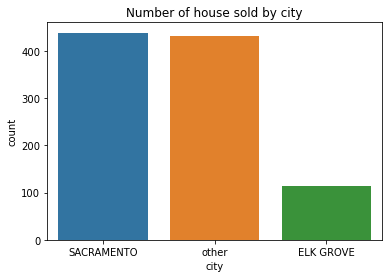

In [207]:
sns.countplot(x='city', data=sacramento)
plt.title('Number of house sold by city')
plt.show()

In [17]:
sacramento['zip'].value_counts()

95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95619     1
95614     1
95690     1
95633     1
95722     1
Name: zip, Length: 68, dtype: int64

In [18]:
sacramento['zip'].nunique()

68

In [19]:
#checking values of data columns
sacramento['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [20]:
#Delete data contain Unknown in type column 
sacramento = sacramento[sacramento['type'] != 'Unkown']

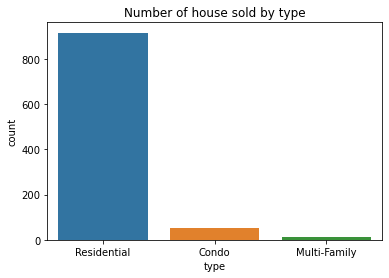

In [21]:
sns.countplot(x='type', data=sacramento)
plt.title('Number of house sold by type')
plt.show()

In [22]:
#checking simple statistics 
sacramento.describe().round(2)

,beds,baths,sq__ft,price
count,984.00,984.00,984.00,984.00
mean,2.91,1.78,1314.25,233674.00
std,1.31,0.89,855.53,139153.31
min,0.00,0.00,-984.00,-210944.00
25%,2.00,1.00,951.50,145000.00
50%,3.00,2.00,1304.00,213723.50
75%,4.00,2.00,1718.50,300000.00
max,8.00,5.00,5822.00,884790.00


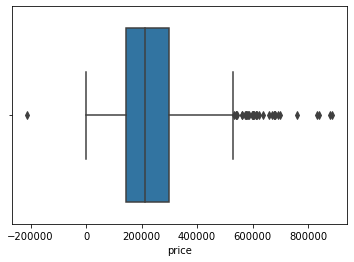

In [23]:
#exploring extreme outliers
sns.boxplot( x ='price', data=sacramento);

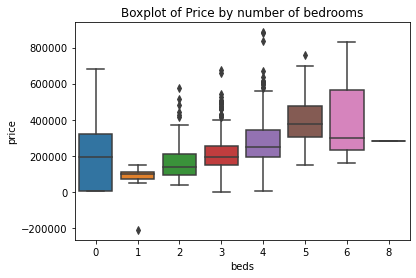

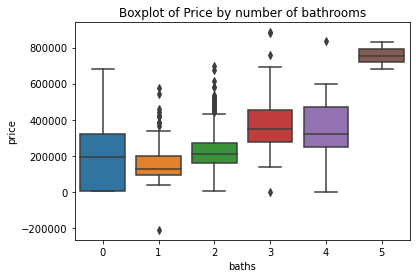

In [24]:
sns.boxplot(x='beds', y='price', data=sacramento)
plt.title('Boxplot of Price by number of bedrooms')
plt.show()
sns.boxplot(x='baths', y='price', data=sacramento)
plt.title('Boxplot of Price by number of bathrooms')
plt.show()

In [25]:
#There are some extreme outliers, and potentially worng

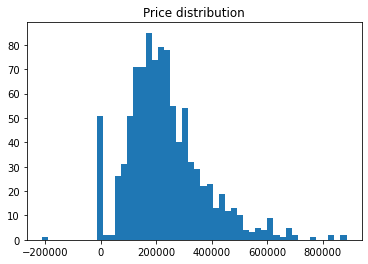

In [26]:
#checking price distribution
plt.hist(sacramento['price'], bins=50)
plt.title('Price distribution')
plt.show()

In [27]:
#checking for potentially wrong input 
sacramento[sacramento['price'] <=0]

,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,SACRAMENTO,95835,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,121.503471,38.668433


In [28]:
#the data index 703 has input of sq__ft and price as negative integer which could be error input
#change negative integer of price and sq__ft to positive integer
sacramento['price'] = sacramento['price'].abs()        
sacramento['sq__ft'] = sacramento['sq__ft'].abs()    

In [29]:
#the data index 703 also had switched input for latitude and longitude
#switch values between latitude and longitude for data indexing 703
sacramento.loc[703,['latitude','longitude']]=sacramento.loc[703,['longitude','latitude']].values

In [30]:
#checking data index 703
sacramento.loc[703]

city                           SACRAMENTO
zip                                 95835
beds                                    1
baths                                   1
sq__ft                                984
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                              210944
latitude                        38.668433
longitude                      121.503471
Name: 703, dtype: object

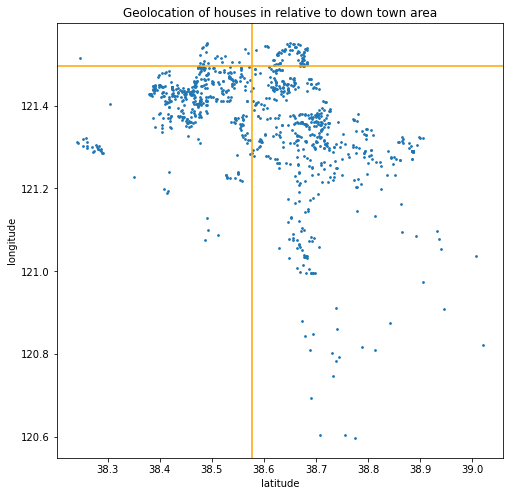

In [31]:
# Checking location of house sold 
plt.figure(figsize = (8,8))
plt.scatter(sacramento['latitude'] , sacramento['longitude'], s=3)
plt.title('Geolocation of houses in relative to down town area')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.axhline(121.49552187832649, color="orange")
plt.axvline(38.577364898654125, color="orange")
plt.show()

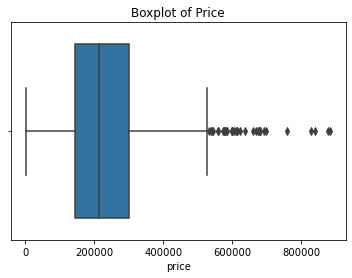

In [32]:
#exploring extreme outliers
sns.boxplot( x ='price', data=sacramento)
plt.title('Boxplot of Price')
plt.show()

In [33]:
#date time data type is not acceptable in regression analysis
#splitting 'sale_date' to day, month, date time and year
#then drop edit columns because it's irrelevant
#drop month and year because there is only one values
sacramento[['day', 'month', 'date', 'time', 'edt', 'year']] = sacramento['sale_date'].str.split(pat = ' ', expand = True)
sacramento.drop(columns= ['edt', 'month','year'], inplace=True, axis=1)
sacramento.head()

,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day,date,time
0,SACRAMENTO,95838,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,121.434879,Wed,21,00:00:00
1,SACRAMENTO,95823,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,121.431028,Wed,21,00:00:00
2,SACRAMENTO,95815,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,121.443839,Wed,21,00:00:00
3,SACRAMENTO,95815,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,121.439146,Wed,21,00:00:00
4,SACRAMENTO,95824,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.51947,121.435768,Wed,21,00:00:00


#### dealing with data with input as '0'

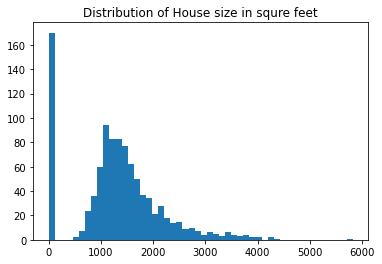

In [35]:
#checking sq__ft distribution
plt.hist(sacramento['sq__ft'], bins=50)
plt.title('Distribution of House size in squre feet')
plt.show()

In [36]:
#checking statistics of data that have 0 square feets
df = sacramento[sacramento['sq__ft'] <= 0]
df.describe().round(2)

,beds,baths,sq__ft,price
count,170.00,170.00,170.0,170.00
mean,1.34,0.91,0.0,256388.98
std,1.84,1.25,0.0,204416.52
min,0.00,0.00,0.0,1551.00
25%,0.00,0.00,0.0,4897.00
50%,0.00,0.00,0.0,268875.00
75%,3.00,2.00,0.0,400000.00
max,6.00,5.00,0.0,879000.00


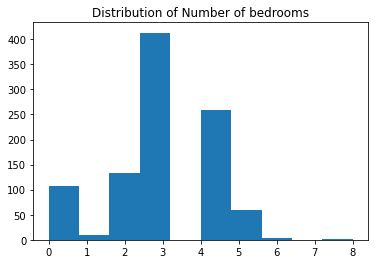

In [37]:
#checking number of bedroom distribution
plt.hist(sacramento['beds'], bins=10)
plt.title('Distribution of Number of bedrooms')
plt.show()

In [38]:
#checking the price of 0 bedroom-house comparing to others
sacramento.groupby(['beds'])['price'].agg(['count','mean', 'median']).round(2)

,count,mean,median
beds,,,
0,107,186768.08,194818.0
1,10,109646.20,103426.0
2,133,165428.30,136500.0
3,413,215612.92,195500.0
4,258,283260.09,251000.0
5,59,399541.54,375000.0
6,3,429966.67,300000.0
8,1,282400.00,282400.0


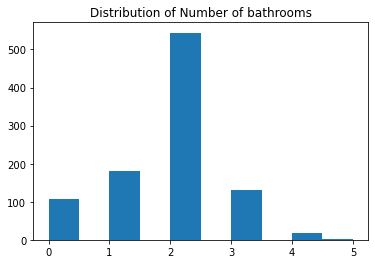

In [39]:
#checking number of bathroom distribution
plt.hist(sacramento['baths'], bins=10);
plt.title('Distribution of Number of bathrooms')
plt.show()

In [40]:
#checking the price of 0 bathroom-house comparing to others
sacramento.groupby(['baths'])['price'].agg(['count','mean', 'median']).round(2)

,count,mean,median
baths,,,
0,107,186768.08,194818.0
1,180,159024.67,130500.0
2,544,226498.98,210000.0
3,132,380352.14,346702.0
4,19,358765.74,320000.0
5,2,755000.00,755000.0


In [41]:
#there are 171 data of sq__ft have input as 0  and 
#there are 171 data of sq__ft have input as 0  and  108 rows of data that containing 0 bathroom and bedroom. 

In [42]:
#way 1  deleting : dealing with dealing with data with input as '0'  
#delete all data with input as '0' 
sacramento_drop_0 = sacramento[sacramento['sq__ft'] != 0]
sacramento_drop_0 = sacramento_drop_0[sacramento['beds'] != 0]
sacramento_drop_0 = sacramento_drop_0[sacramento['baths'] != 0]

C:\Users\science01\AppData\Local\Temp\ipykernel_1056\4207650771.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sacramento_drop_0 = sacramento_drop_0[sacramento['beds'] != 0]
C:\Users\science01\AppData\Local\Temp\ipykernel_1056\4207650771.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sacramento_drop_0 = sacramento_drop_0[sacramento['baths'] != 0]


In [43]:
sacramento_drop_0.describe()

,beds,baths,sq__ft,price
count,814.000000,814.000000,814.000000,814.000000
mean,3.244472,1.960688,1591.146192,229448.369779
std,0.852137,0.669804,663.841930,119825.576060
min,1.000000,1.000000,484.000000,2000.000000
25%,3.000000,2.000000,1144.000000,148750.000000
50%,3.000000,2.000000,1418.500000,207986.500000
75%,4.000000,2.000000,1851.000000,284973.250000
max,8.000000,5.000000,5822.000000,884790.000000


In [44]:
#save the clean dataframe to a new file called sacramento_cleaned and export to CSV file 
sacramento_drop_0.to_csv('./datasets/sacramento_drop_0.csv', index=False)

In [45]:
#way 2  imputing: dealing with data with input as '0' 

In [46]:
#there are 171 data of sq__ft have input as 0 which is impossible to have a house with 0 square feet
#dropping 171 data is too much because they are counted as 17.3% of total data 
#the data also right skewed thus, I decided to replace 0 in sq__ft with median 
sacramento['sq__ft'] = sacramento['sq__ft'].replace([0],sacramento['sq__ft'].median())

In [47]:
#there are 108 rows of data that containing 0 bathroom and bedroom. 
#The average prices for this group also higher than house that has 1 bathroom or bedroom
#This imply that the number 0 of bathroom and bedroom seems incorrect. 
#dropping 108 data is too much because they are counted as 10% of total data 
#thus, both number of bedrooms and bathrooms are imputed with median 
sacramento['beds'] = sacramento['beds'].replace([0],sacramento['beds'].median())
sacramento['baths'] = sacramento['baths'].replace([0],sacramento['baths'].median())

In [48]:
#save the dataframe with imputation of 0 values in house size, number of bedrooms, and number of bathroom
#to a new file called sacramento_cleaned and export to CSV file 
sacramento_cleaned_imputed = sacramento
sacramento_cleaned_imputed.to_csv('./datasets/sacramento_cleaned_imputed.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

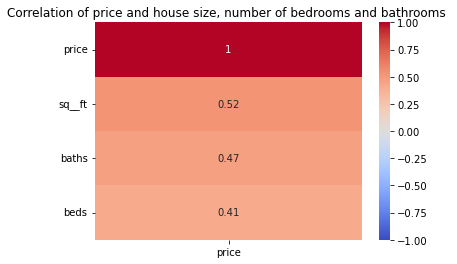

In [49]:
sns.heatmap(sacramento_cleaned_imputed.corr()[['price']].sort_values(by = 'price', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of price and house size, number of bedrooms and bathrooms ')

plt.yticks(rotation =0)
plt.show()

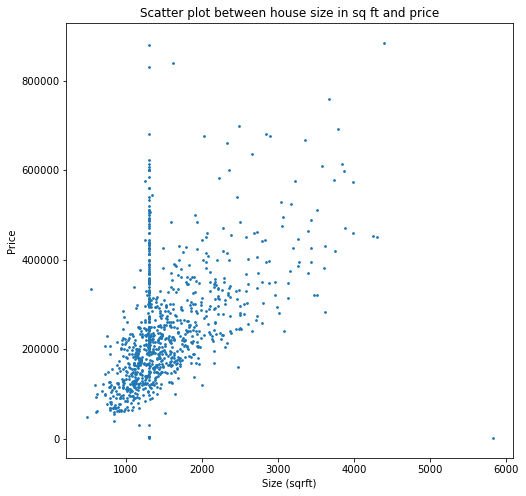

In [50]:
#No1 variable as predictors of price in an SLR model: sq__ft
plt.figure(figsize = (8,8))
plt.scatter(sacramento_cleaned_imputed['sq__ft'], sacramento_cleaned_imputed['price'], s=3)
plt.title('Scatter plot between house size in sq ft and price')
plt.xlabel('Size (sqrft)')
plt.ylabel('Price')
plt.show()

In [51]:
np.corrcoef(sacramento_cleaned_imputed['sq__ft'], sacramento_cleaned_imputed['price'])

array([[1.        , 0.52442877],
       [0.52442877, 1.        ]])

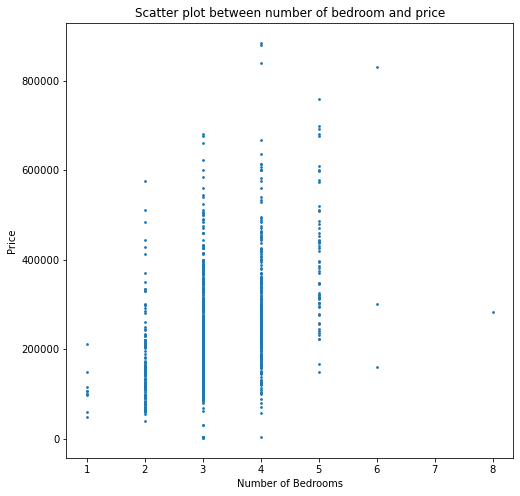

In [52]:
#No2 variable as predictors of price in an SLR model: beds
plt.figure(figsize = (8,8))
plt.scatter(sacramento_cleaned_imputed['beds'], sacramento_cleaned_imputed['price'], s= 3)  
plt.title('Scatter plot between number of bedroom and price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [53]:
np.corrcoef(sacramento_cleaned_imputed['beds'], sacramento_cleaned_imputed['price'])

array([[1.        , 0.41044465],
       [0.41044465, 1.        ]])

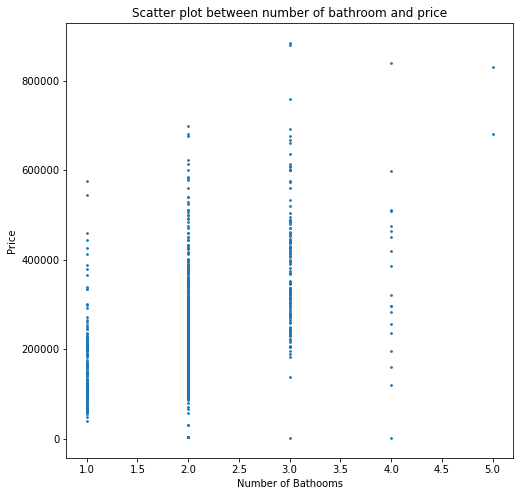

In [54]:
#No3 variable as predictors of price in an SLR model: baths
plt.figure(figsize = (8,8))
plt.scatter(sacramento_cleaned_imputed['baths'], sacramento_cleaned_imputed['price'], s= 3) 
plt.title('Scatter plot between number of bathroom and price')
plt.xlabel('Number of Bathooms')
plt.ylabel('Price')
plt.show()

In [55]:
np.corrcoef(sacramento_cleaned_imputed['baths'], sacramento_cleaned_imputed['price'])

array([[1.        , 0.46519605],
       [0.46519605, 1.        ]])

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [56]:
#sq__ft or size of the houses will be the best predictor of price in an SLR model
#because the scatter plot shows possible linear trend with correlation coefficient 0.52

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [58]:
x = sacramento_cleaned_imputed['sq__ft']
y = sacramento_cleaned_imputed['price']

In [59]:
x_bar = x.mean()
x_bar

1541.5376016260163

In [60]:
y_bar = y.mean()
y_bar

234102.74390243902

In [61]:
x_std = x.std()
x_std

613.408309720468

In [62]:
y_std = y.std()
y_std

138430.0611958662

In [63]:
r_xy = x.corr(y)    
r_xy

0.5244287659197497

In [64]:
#coefficient on X  or slope
b1 = r_xy*y_std/x_std
b1

118.34972726767606

In [65]:
#intercept of the model 
b0 = y_bar -b1*x_bar
b0

51662.18917713253

In [66]:
#apply the model
y_predicted = b0 +b1*x

In [67]:
# calculate rediduals
resids = y - y_predicted
resids_sqr = resids**2

In [68]:
# Compute the MSE  
mse = resids_sqr.mean()
mse

13878481601.50011

In [69]:
# Compute the RMSE  
rmse = mse**0.5
rmse

117806.96754224731

In [70]:
# comparing to the null MSE
null_mse = np.mean ((y-y_bar)**2)
# The R2 
r2 = 1-mse/null_mse
r2

0.27502553052411394

In [71]:
print(f'Model intercept: {round(b0,2)}')
print(f'Model coefficient: {round(b1,2)}')

Model intercept: 51662.19
Model coefficient: 118.35


### 6. Interpret the intercept and the slope.

In [72]:
#For every 1 square feet increase in size of house , we expect  house price  to increase by $118.3.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
#Model intercept: 51662.19
#Model coefficient: 118.35
#Applying regression model to make an inference.
    #The regression model can be used to explain how much price of a house in sacramento in May 2008 depends on the size of house. 
    
#Applying regression model to make a prediction
    # #The regression model can be used to predict the house price based on the size of house in the future (after May 2008) 

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [73]:
y_predicts = b0 + b1*x
residuals = y - y_predicts 

Text(0, 0.5, 'residuals')

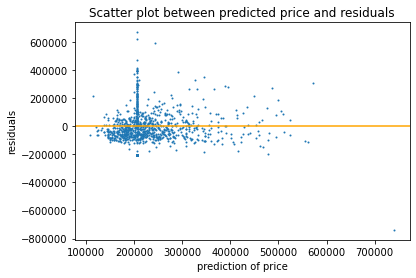

In [74]:
plt.scatter(y_predicts, residuals, s=1)
plt.axhline(0, color="orange")
plt.title('Scatter plot between predicted price and residuals')
plt.xlabel('prediction of price')
plt.ylabel('residuals')

Text(0, 0.5, 'predicted price')

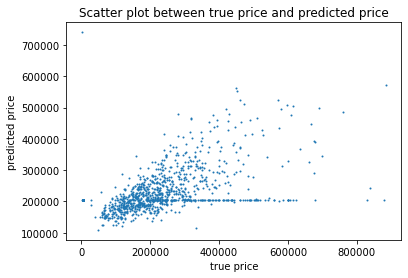

In [75]:
plt.scatter(y, y_predicts, s = 1)
plt.title('Scatter plot between true price and predicted price')
plt.xlabel('true price')
plt.ylabel('predicted price')

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [76]:
sacramento_cleaned_imputed = pd.get_dummies(columns=['type'], drop_first =True,  data =sacramento_cleaned_imputed)

In [77]:
sacramento_cleaned_imputed.rename \
(columns = {'type_Multi-Family':'type_multi_family', 'type_Residential': 'type_residential'}, inplace = True)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [78]:
sacramento_cleaned_imputed.head()

,city,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude,day,date,time,type_multi_family,type_residential
0,SACRAMENTO,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,121.434879,Wed,21,00:00:00,0,1
1,SACRAMENTO,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,121.431028,Wed,21,00:00:00,0,1
2,SACRAMENTO,95815,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,121.443839,Wed,21,00:00:00,0,1
3,SACRAMENTO,95815,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,121.439146,Wed,21,00:00:00,0,1
4,SACRAMENTO,95824,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.51947,121.435768,Wed,21,00:00:00,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [79]:
#Assemble our X and y variables
X=sacramento_cleaned_imputed[['sq__ft', 'beds', 'baths', 'type_multi_family','type_residential']]
y = sacramento_cleaned_imputed['price']

In [80]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

In [81]:
#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#Baseline score 
cross_val_score(model, X, y).mean()

0.19945333589561365

In [83]:
# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

Train R-squared Score: 0.31568743738687466


In [85]:
#Train scores is better than baseline score
# An R^2 value of 0.31 means that 31 % of the variability in housing price is explained by 
# the house size, number of bedrooms and bathrooms  and type of house in our model
# However, the R^2 value of 0.31 indicates the model is under fitting (high bias)

In [86]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: 0.2847953011434339


In [87]:
#Test score and train scores are fairly close to each other indicating that variance appears not a concern

In [88]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([0.27599358, 0.31468431, 0.30920001, 0.37080368, 0.2123922 ])

In [89]:
# There is relatively medium range of R^2 from cross validation ranging from 0.21 to 0.31), 
#possibly due to outliers. 
#The reliability of this model might be low. 

In [90]:
#make prediction
y_preds = model.predict(X_test)

In [91]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.31568743738687466
MSE is : 15554835857.127129
RMSE is : 124719.02764665514


In [92]:
#RMSE of 124719 indicate that on average, the predicted price is $124719 off from the observed price.

In [93]:
#check the model intercept
print(f'Model intercept {model.intercept_}')

Model intercept -20420.30375723107


In [94]:
#check the model coefficient
pd.Series(model.coef_, index = X.columns)

sq__ft                  84.774523
beds                 -3260.856452
baths                60614.589725
type_multi_family   -94601.861026
type_residential     17095.302280
dtype: float64

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

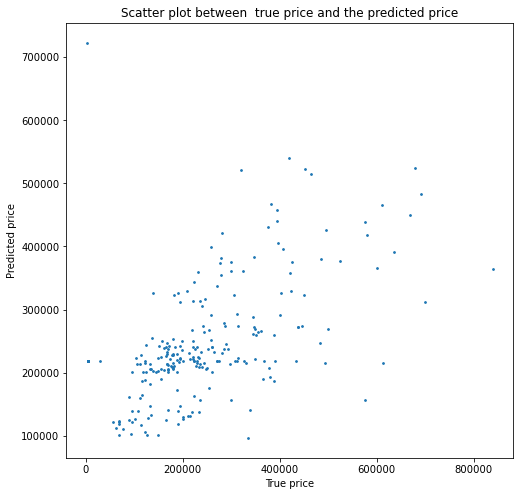

In [95]:
#true price vs the predicted price 
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_preds, s= 3) 
plt.title('Scatter plot between  true price and the predicted price')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()

In [96]:
#There are some cases that has large gap between the true price vs the predicted price 
#especially houses that have very low true price but has extremely large predicted price

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

    1. Linear relationship: There exists a linear relationship between each predictor variable and the response variable.

    2. Normality: The residuals of the model are normally distributed.

    3. Independence: The observations are independent.

    4. Equal variances (of residuals - AKA Homoscedasticity): The residuals have constant variance at every point in the linear model.

    5. No Multicollinearity: None of the predictor variables are highly correlated with each other.
    
    (numer 1-4 are the same as the assumptions for an SLR model)

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

In [97]:
#Linear relationship

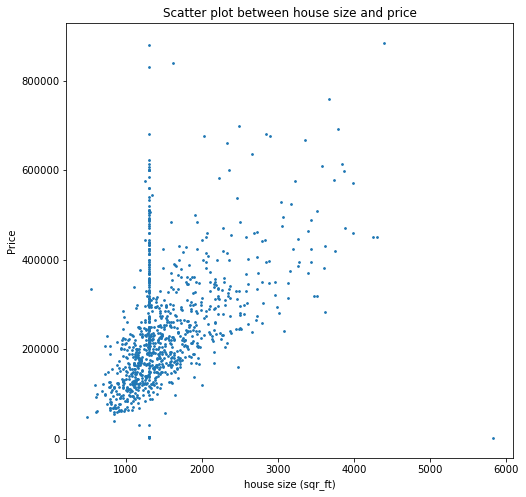

In [98]:
plt.figure(figsize = (8,8))
plt.scatter(X['sq__ft'], y, s= 3) 
plt.title('Scatter plot between house size and price')
plt.xlabel('house size (sqr_ft)')
plt.ylabel('Price')
plt.show()

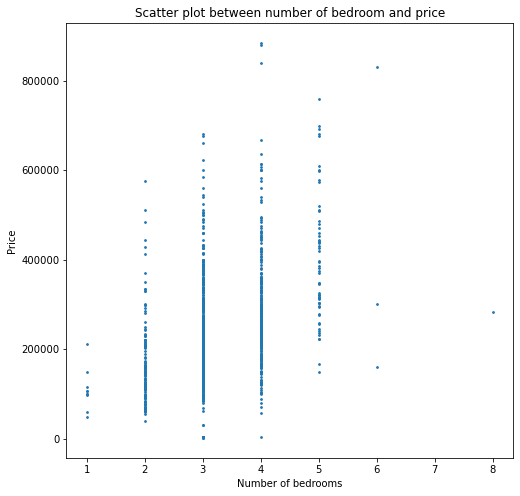

In [99]:
plt.figure(figsize = (8,8))
plt.scatter(X['beds'], y, s= 3) 
plt.title('Scatter plot between number of bedroom and price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()

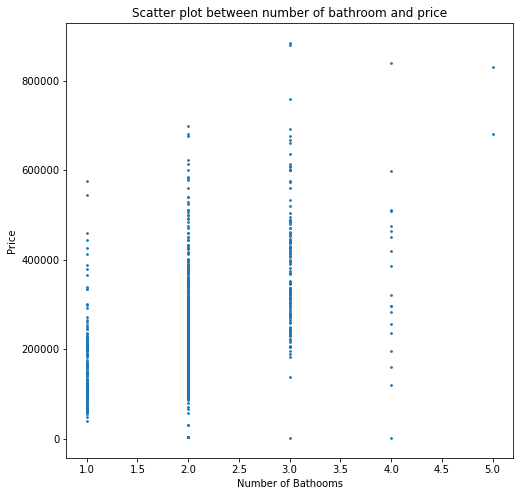

In [100]:
plt.figure(figsize = (8,8))
plt.scatter(X['baths'], y, s= 3) 
plt.title('Scatter plot between number of bathroom and price')
plt.xlabel('Number of Bathooms')
plt.ylabel('Price')
plt.show()

In [101]:
#the relationship between the size of house is relatively linear with price. 
#But the relationship between number of bedroom and bathroom is not linear with price

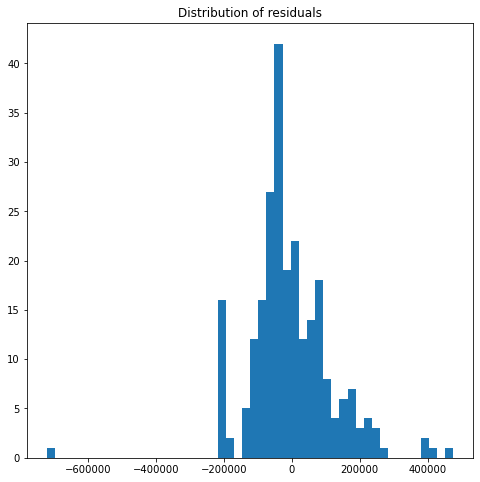

In [102]:
#Normality
plt.figure(figsize = (8,8))
resids = y_test - y_preds
plt.hist(resids, bins = 50)
plt.title('Distribution of residuals')
plt.show()

In [103]:
resids.skew()

-0.03338391864826863

In [104]:
#The normality assumption might be violated since the residual is relatively left skewed.

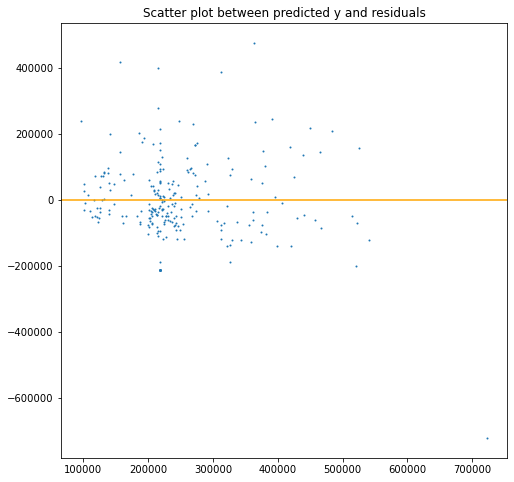

In [105]:
#Equal variances
plt.figure(figsize = (8,8))
plt.scatter(y_preds, resids, s=1)
plt.axhline(0, color ='orange')
plt.title('Scatter plot between predicted y and residuals')
plt.show()

In [106]:
#The equal variancesassumption might be violated since the residual is not constant in every point.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [107]:
#import statsmodels.api as sm
#X=sacramento_cleaned_imputed[['sq__ft', 'beds', 'baths', 'type_condo', 'type_multi_family','type_residential']]
#X = sm.add_constant(X)
#y = sacramento_cleaned_imputed['price']
#ols = sm.OLS(y, X).fit()

In [108]:
#ols.summary()

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [109]:
def r2_adj(X,y):
        adj_r2 = 1 - (1-metrics.r2_score(y, y_preds))*len(y-1) / (len(y)-X.shape[1]-1)
        return adj_r2

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [110]:
#R^2 
model.score(X_train, y_train)


0.31568743738687466

In [111]:
#Train scores is better than baseline score
# An R^2 value of 0.31 means that 31 % of the variability in housing price is explained by 
# the house size, number of bedrooms and bathrooms in our model
# However, the R^2 value of 0.31 indicates the model is under fitting (high bias)

In [112]:
# MSE
mean_squared_error(y_test, y_preds)

15554835857.127129

In [113]:
# MSE of 155,5483,5857 represents average distance squared from the predicted value

In [114]:
#RMSE
mean_squared_error(y_test, y_preds, squared = False)

124719.02764665514

In [115]:
#RMSE of 124719 indicates that on average, the prdicted price is $124719 off from the observed price.

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

#### 18.1 Model1: updated model with the removal of value of 0

In [127]:
#Assemble our X and y variables
X= sacramento_drop_0[['sq__ft', 'beds', 'baths', 'type']]
X = pd.get_dummies(columns=['type'], drop_first =True, data =X )
y = sacramento_drop_0['price']

In [128]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

In [129]:
#Instantiate the model/Fit Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

Train R-squared Score: 0.5104904786590879


In [131]:
#Train scores is better than baseline score and better than previous model.
# An R^2 value of 0.51 means that 51 % of the variability in housing price is explained by 
# the house size, number of bedrooms and bathrooms in our model (with 0 input removal)
# However, the R^2 value of 0.51 indicates the model is relatively under fitting (high bias)

In [132]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: 0.41180661083750125


In [133]:
#Test score and train scores are fairly close to each other indicating that variance appears not a concern

In [134]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([0.51647255, 0.15090431, 0.52785239, 0.50547008, 0.66547307])

In [135]:
cross_val_score(model, X_train, y_train, cv =5).mean()

0.4732344783713051

In [136]:
# There is relatively narrow range of R^2 from cross validation and the mean score is relatively close to test score and train score
#The reliability of this model is acceptable. 

In [137]:
#make prediction
y_preds = model.predict(X_test)

In [138]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.5104904786590879
MSE is : 7105871041.923587
RMSE is : 84296.32875709112


In [139]:
#The RMSE of this model is lower than previous model indicating that the model is better in predicting housing price. 
#RMSE of 84296 indicate that on average, the predicted price is $84296 off from the observed price.

In [140]:
#check the model intercept
print(f'Model intercept {model.intercept_}')

Model intercept 24035.280596196593


In [141]:
#check the model coefficient
pd.Series(model.coef_, index = X.columns)

sq__ft                 136.219864
beds                -11834.231471
baths                 -121.109145
type_Multi-Family   -22428.623834
type_Residential     30339.636043
dtype: float64

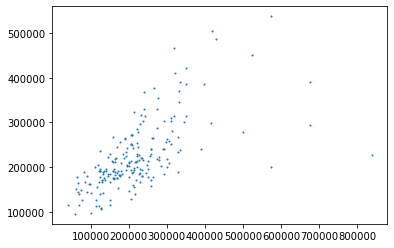

In [142]:
#true price vs the predicted price 
plt.scatter(y_test, y_preds, s = 1);

#### 18.2 Model2: new model with extreme values removal

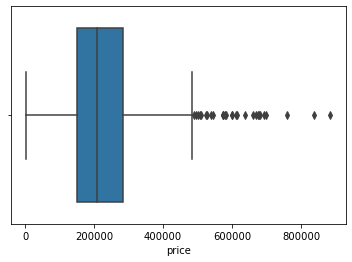

In [143]:
#exploring extreme outliers
sns.boxplot( x ='price', data=sacramento_drop_0);


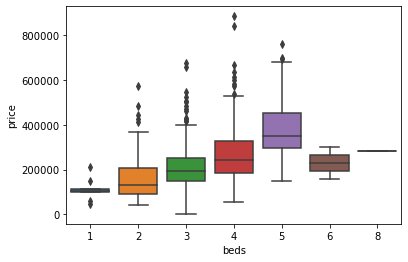

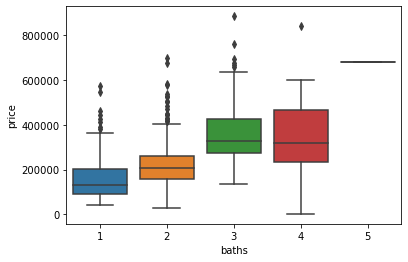

In [144]:
#exploring extreme outliers in each groups
sns.boxplot(x='beds', y='price', data=sacramento_drop_0)
plt.show()
sns.boxplot(x='baths', y='price', data=sacramento_drop_0)
plt.show()

In [145]:
#Since there are some cases that has large gap between the true price vs the predicted price 
#Thus, extreme outliers in price with 

q_low = sacramento_drop_0['price'].quantile(0.01)
q_hi  = sacramento_drop_0['price'].quantile(0.99)

sacramento_drop_0_filtered = \
sacramento_drop_0[(sacramento_drop_0['price'] < q_hi) & (sacramento_drop_0['price'] > q_low)]

In [146]:
#checking number of deleted data 
sacramento_drop_0.shape[0] - sacramento_drop_0_filtered.shape[0]

18

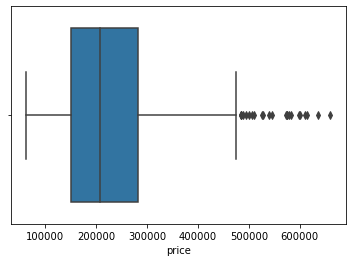

In [147]:
#check extreme outliers again
sns.boxplot( x ='price', data= sacramento_drop_0_filtered);

In [148]:
#Assemble our X and y variables
X= sacramento_drop_0_filtered[['sq__ft', 'beds', 'baths', 'type']]
X = pd.get_dummies(columns=['type'], drop_first =True, data =X )
y = sacramento_drop_0_filtered['price']

In [149]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

In [150]:
#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [151]:
# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

Train R-squared Score: 0.5742838494995914


In [152]:
#Train scores is better than baseline score and better than previous model.
# An R^2 value of 0.574 means that 57.4 % of the variability in housing price is explained by 
# the house size, number of bedrooms and bathrooms in our model (with extreme outliers and 0 input removal)
# However, the R^2 value of 0.574 indicates the model is relatively under fitting (high bias)

In [153]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: 0.44757462426747296


In [154]:
#Test score and train scores are fairly close to each other indicating that variance appears not a concern

In [155]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([0.51219409, 0.55263323, 0.66073133, 0.49878526, 0.54056396])

In [156]:
# There is medium range of R^2 from cross validation ranging from 0.49 to 0.66).
#The reliabitly of this model is acceptable. 

In [157]:
#make prediction
y_preds = model.predict(X_test)

In [158]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.5742838494995914
MSE is : 5792537331.223974
RMSE is : 76108.72046765714


In [159]:
#The RMSE of this model is lower than previous model indicating that the model is better in predicting housing price. 
#RMSE of 76108 indicate that on average, the predicted price is $76108 off from the observed price.

In [160]:
#check the model intercept
print(f'Model intercept {model.intercept_}')

Model intercept 43637.175450037525


In [161]:
#check the model coefficient
pd.Series(model.coef_, index = X.columns)

sq__ft                 150.940054
beds                -29462.416377
baths                 1605.662444
type_Multi-Family   -10772.102765
type_Residential     37519.862516
dtype: float64

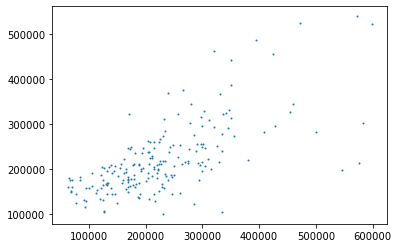

In [162]:
#true price vs the predicted price 
plt.scatter(y_test, y_preds, s = 1);

#### 18.3 Model 3: new model with adding more variables about location using city

In [163]:
#Assemble our X and y variables
X=sacramento_drop_0_filtered[['sq__ft', 'beds', 'baths', 'type','city']]
X = pd.get_dummies(columns=['type','city'], drop_first =True, data =X )
y = sacramento_drop_0_filtered['price']


In [164]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

In [165]:
#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [166]:
# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

Train R-squared Score: 0.6018905609964789


In [167]:
#Train scores is better than baseline score and better than previous model.
# An R^2 value of 0.60 means that 60% of the variability in housing price is explained by 
# the house size, number of bedrooms and bathrooms, and city in our model
# However, the R^2 value of 0.60indicates the model is under fitting (high bias)

In [168]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: 0.4647301337356172


In [169]:
#Test score and train scores are getting far apart from each others indicating that the variance of the model needed to be considered

In [170]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([0.50695986, 0.56052626, 0.70422979, 0.54688895, 0.56579122])

In [171]:
# There is relatively modium range of R^2 from cross validation ranging from 0.50 to 0.70).
#The reliability of this model needed to be considered

In [172]:
#make prediction
y_preds = model.predict(X_test)

In [173]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.6018905609964789
MSE is : 5612650719.573269
RMSE is : 74917.6262275659


In [174]:
#The RMSE of this model is lower than previous model.
#RMSE of 74917 indicate that on average, the prdicted price is $74917 off from the observed price.

In [175]:
#check the model intercept
print(f'Model intercept {model.intercept_}')

Model intercept 44428.10624747613


In [176]:
#check the model coefficient
pd.Series(model.coef_, index = X.columns)

sq__ft                 147.140638
beds                -27743.183202
baths                 -306.760903
type_Multi-Family    -1886.786229
type_Residential     38144.127911
city_SACRAMENTO     -12765.823700
city_other           26813.221840
dtype: float64

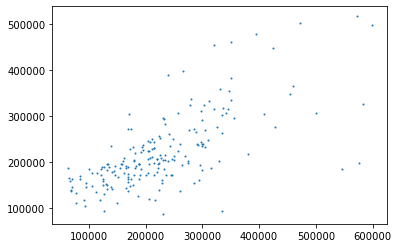

In [177]:
#true price vs the predicted price 
plt.scatter(y_test, y_preds, s = 1);

#### 18.4  Model 4 : new model with more variables about the location of the house using zip code

In [178]:
#Assemble our X and y variables
X=sacramento_drop_0_filtered[['sq__ft', 'beds', 'baths', 'type','city', 'zip']]
X = pd.get_dummies(columns=['type','city','zip'], drop_first =True, data =X )
y = sacramento_drop_0_filtered['price']

C:\Users\science01\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [179]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

In [180]:
#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [181]:
# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

Train R-squared Score: 0.7508152797891675


In [182]:
#Train scores is better than baseline score and better than previous model.
# An R^2 value of 0.75 means that 75% of the variability in housing price is explained by 
# the house size, number of bedrooms and bathrooms, city, and location of the house using Zip code in our model (with extreme outliers removal)
# The R^2 value of 0.75 indicates that the model is better in predicting the data (getting lower in bias)

In [183]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: 0.5780100017966636


In [184]:
#The difference between test score and train scores are getting bigger from each other indicating that the model has higher variance: potentially over fitting 

In [185]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([0.40503155, 0.62116989, 0.74244246, 0.59544106, 0.69475808])

In [186]:
cross_val_score(model, X_train, y_train, cv =5).mean()

0.6117686078508788

In [187]:
# There is relatively bigger range of R^2 from cross validation ranging from 0.40 to 0.74.
#The reliability of this model starts to be questionable.

In [188]:
#make prediction
y_preds = model.predict(X_test)

In [189]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.7508152797891675
MSE is : 4424838042.160265
RMSE is : 66519.45611744179


In [190]:
#The RMSE of this model is lower than previous model. 
#RMSE of 66519 indicate that on average, the predicted price is $66519 off from the observed price.

In [191]:
#check the model intercept
print(f'Model intercept {model.intercept_}')

Model intercept 61873.466369414295


In [192]:
#check the model coefficient
pd.Series(model.coef_, index = X.columns)

sq__ft                  118.551506
beds                 -15697.659363
baths                  5926.319265
type_Multi-Family      1388.319782
type_Residential      42294.022721
                         ...      
zip_95838            -66733.767753
zip_95841             15601.958299
zip_95842            -44121.284691
zip_95843           -114599.489070
zip_95864             69110.351167
Length: 72, dtype: float64

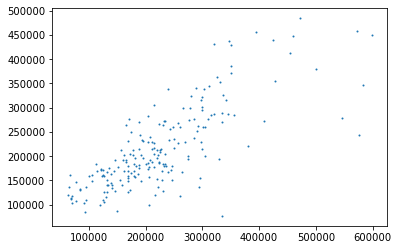

In [193]:
#true price vs the predicted price 
plt.scatter(y_test, y_preds, s = 1);

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

The test score for Model 4 : modeling using zip code is tend to be overfitting with high variance because the value gap between test score and train scores are relatively wide from each other. After the bias-variance tradeoff consideration, I think model 3: modeling with house size, number of bathrooms, number of bedrooms, type of house and city is relatively in the sweet spot with higher lower bias.